# Breast Cancer Classification Using Random Forest

Classification Using Random Forest, PCA, & Hyperparameter Tuning

Dataset =  Scikit-learn “breast cancer” dataset.
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html


In [17]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Define columns and load data
# ----------------------------------------------------------------------------------------------------------------------------

columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 
           'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 
           'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 
           'area error', 'smoothness error', 'compactness error', 'concavity error', 
           'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 
           'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 
           'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

dataset = load_breast_cancer()
data = pd.DataFrame(dataset['data'], columns=columns)

data['cancer'] = dataset['target']

display(data.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Analyse / describe the data
# ----------------------------------------------------------------------------------------------------------------------------
#display(data.info())
#display(data.isna().sum())
print(f'Data Shape == {data.shape}')
#display(data.describe())


Data Shape == (569, 31)


In [4]:
# Split Train and Test Data; 50:50 split since the data is small
# ----------------------------------------------------------------------------------------------------------------------------
# - stratify=y to ensure that both the train and test have same proportion of 0s and 1s

X = data.drop('cancer', axis=1)  
y = data['cancer'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state = 2020, stratify=y)


In [5]:
# “center” and “standardize” data by scaling
# ----------------------------------------------------------------------------------------------------------------------------

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

y_train = np.array(y_train)

In [6]:
# Fit baseline RF Model
# ----------------------------------------------------------------------------------------------------------------------------

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

print(f'TRAINING SCORE = {rfc.score(X_train_scaled, y_train)*100}%')

TRAINING SCORE = 100.0%


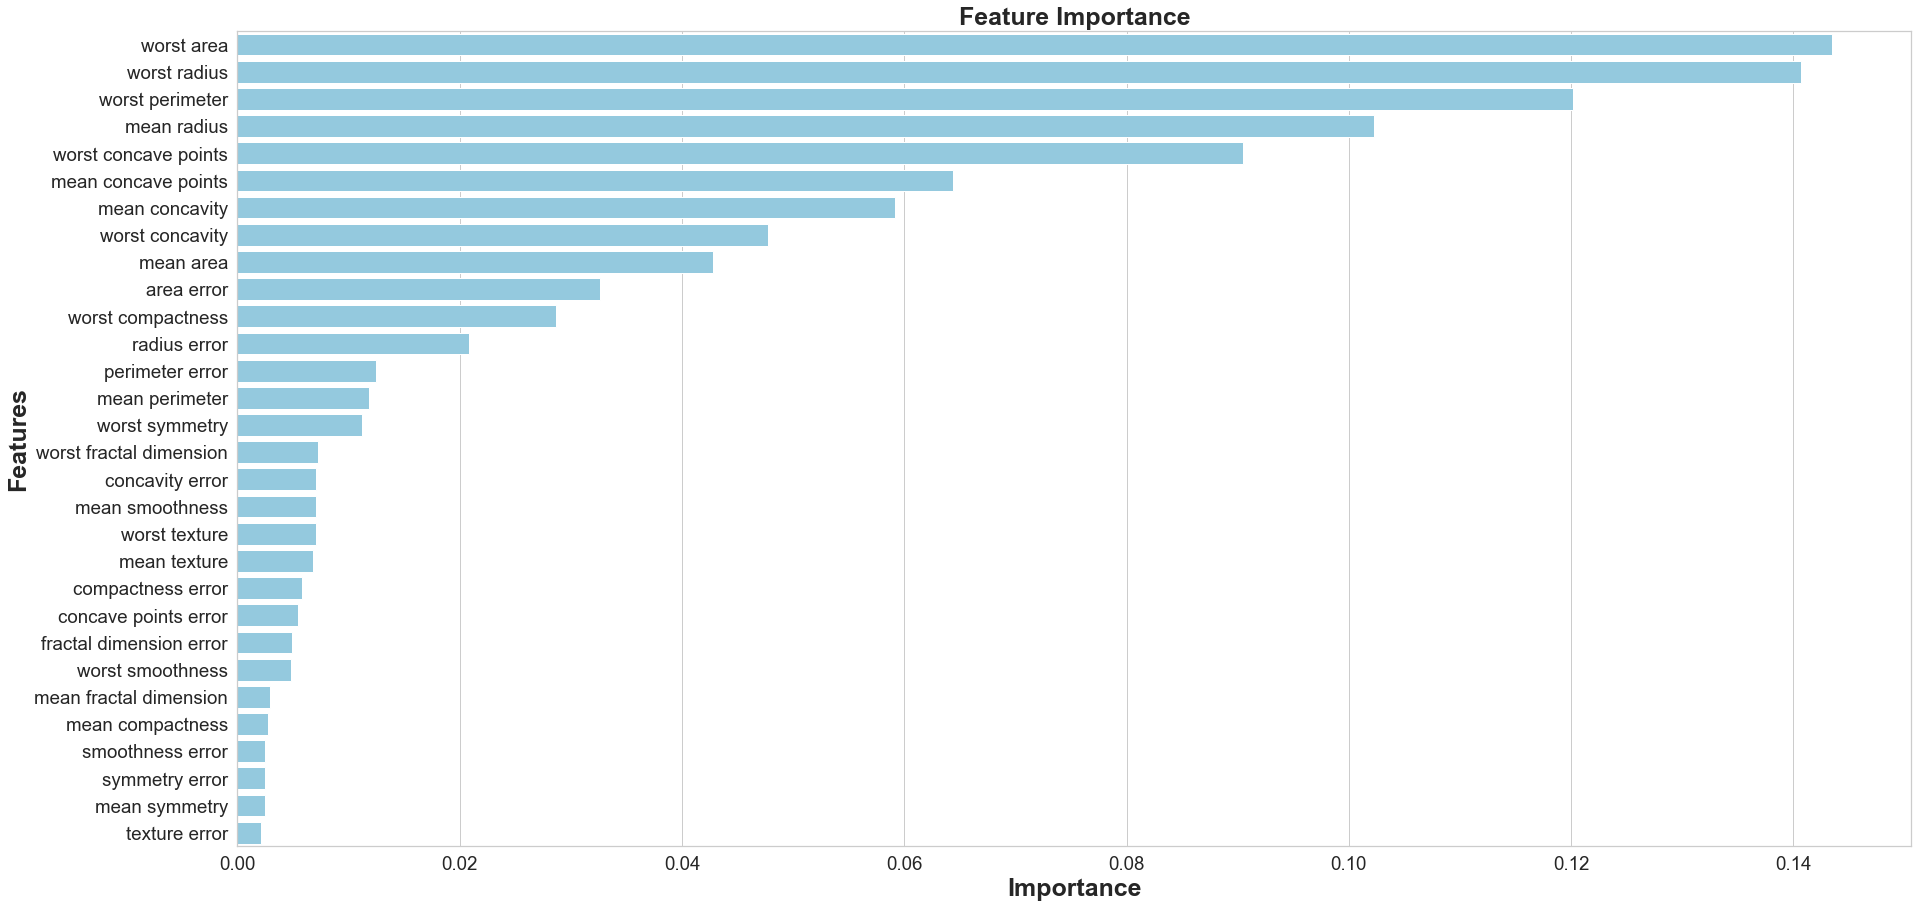

None

,Features,Gini-Importance
0,worst area,0.143452
1,worst radius,0.140659
2,worst perimeter,0.120153
3,mean radius,0.102259
4,worst concave points,0.090481
5,mean concave points,0.064357
6,mean concavity,0.059194
7,worst concavity,0.047711
8,mean area,0.042821
9,area error,0.032605


In [7]:
# Visualize Feature Importances
# ----------------------------------------------------------------------------------------------------------------------------

feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)

fig, ax = plt.subplots()
fig.set_size_inches(30,15)

sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')

display(plt.show())
display(importances)

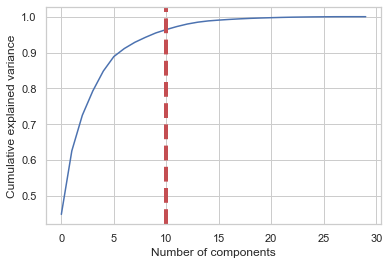

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.448362,0.448362
1,0.625759,0.177397
2,0.724960,0.099201
3,0.792890,0.067930
4,0.848247,0.055357
5,0.888681,0.040435
6,0.911139,0.022457
7,0.928491,0.017353
8,0.942257,0.013766
9,0.954676,0.012419


In [8]:
# PCA (Principal Component Analysis)
# ----------------------------------------------------------------------------------------------------------------------------
# - fit scaled X_train data to the PCA function
# - Looking at the dataframe above, when we use PCA to reduce our 30 predicting variables down to 10 components, 
#   we can still explain over 95% of the variance. 

pca_test = PCA(n_components=30)
pca_test.fit(X_train_scaled)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)

display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

display(pca_df.head(10))


In [9]:
# Reduced dimension datasets
# ----------------------------------------------------------------------------------------------------------------------------

pca = PCA(n_components=10)
pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

# Show Weights for PCA Components

pca_dims = []

for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
    
pca_test_df = pd.DataFrame(pca_test.components_, columns=columns, index=pca_dims)
pca_test_df.head(10).T


,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
mean radius,0.229757,-0.210916,-0.030019,0.046463,0.033286,0.015126,-0.069528,-0.188402,-0.123401,-0.073688
mean texture,0.101159,-0.069574,0.058763,-0.596565,0.003598,-0.043046,0.063547,0.073671,0.162137,-0.154302
mean perimeter,0.236449,-0.193037,-0.028313,0.047683,0.031936,0.007210,-0.063591,-0.188007,-0.121388,-0.064397
mean area,0.230530,-0.212977,0.013286,0.065251,-0.004611,0.000570,-0.006363,-0.095945,-0.136370,-0.082562
mean smoothness,0.137090,0.205970,-0.031698,0.117614,-0.453585,-0.079954,-0.162701,-0.178166,0.124023,0.384612
mean compactness,0.237018,0.166762,-0.048961,0.023697,-0.001176,-0.064327,0.040522,-0.219044,0.004426,0.042943
mean concavity,0.258283,0.046613,0.015929,0.017595,0.080184,-0.038802,-0.094767,0.066544,-0.072309,0.109753
mean concave points,0.261131,-0.027002,-0.012987,0.044803,-0.054359,-0.032057,-0.145943,-0.175107,-0.062065,0.034035
mean symmetry,0.142589,0.199079,-0.025816,0.011965,-0.171304,0.425826,-0.052532,-0.192594,0.573150,-0.366492
mean fractal dimension,0.048243,0.374409,0.019466,0.052554,-0.125120,-0.206347,0.276034,-0.103717,0.037225,0.121591


In [10]:
# Fit baseline model with scaled data after PCA
# ----------------------------------------------------------------------------------------------------------------------------

rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train_scaled_pca, y_train)

print(f'TRAINING SCORE = {rfc_2.score(X_train_scaled_pca, y_train)*100}%')

TRAINING SCORE = 100.0%


In [11]:
# Hyperparameter Tuning: RandomSearchCV
# ----------------------------------------------------------------------------------------------------------------------------

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(rfc_2, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)

rs.fit(X_train_scaled_pca, y_train)
rs.best_params_

# {'n_estimators': 700,
# 'min_samples_split': 2,
# 'min_samples_leaf': 2,
# 'max_features': 'log2',
# 'max_depth': 11,
# 'bootstrap': True}

#{'n_estimators': 700,
# 'min_samples_split': 12,
# 'min_samples_leaf': 2,
# 'max_features': 'sqrt',
# 'max_depth': 13,
# 'bootstrap': False}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


{'n_estimators': 700,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 13,
 'bootstrap': False}

In [12]:
# get a dataframe of RandomSearchCV results
# ----------------------------------------------------------------------------------------------------------------------------

rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,700,12,2,sqrt,13,False,0.936618,1
1,700,2,2,log2,11,True,0.926054,2
2,400,23,2,sqrt,14,False,0.926054,2
3,800,18,39,log2,11,True,0.919037,4
4,700,23,7,log2,15,False,0.919037,4
5,200,12,2,log2,4,True,0.919000,6
6,600,23,2,sqrt,15,False,0.919000,6
7,400,12,39,sqrt,6,True,0.918962,8
8,100,34,28,sqrt,2,True,0.915528,9
9,300,39,2,sqrt,3,True,0.915491,10


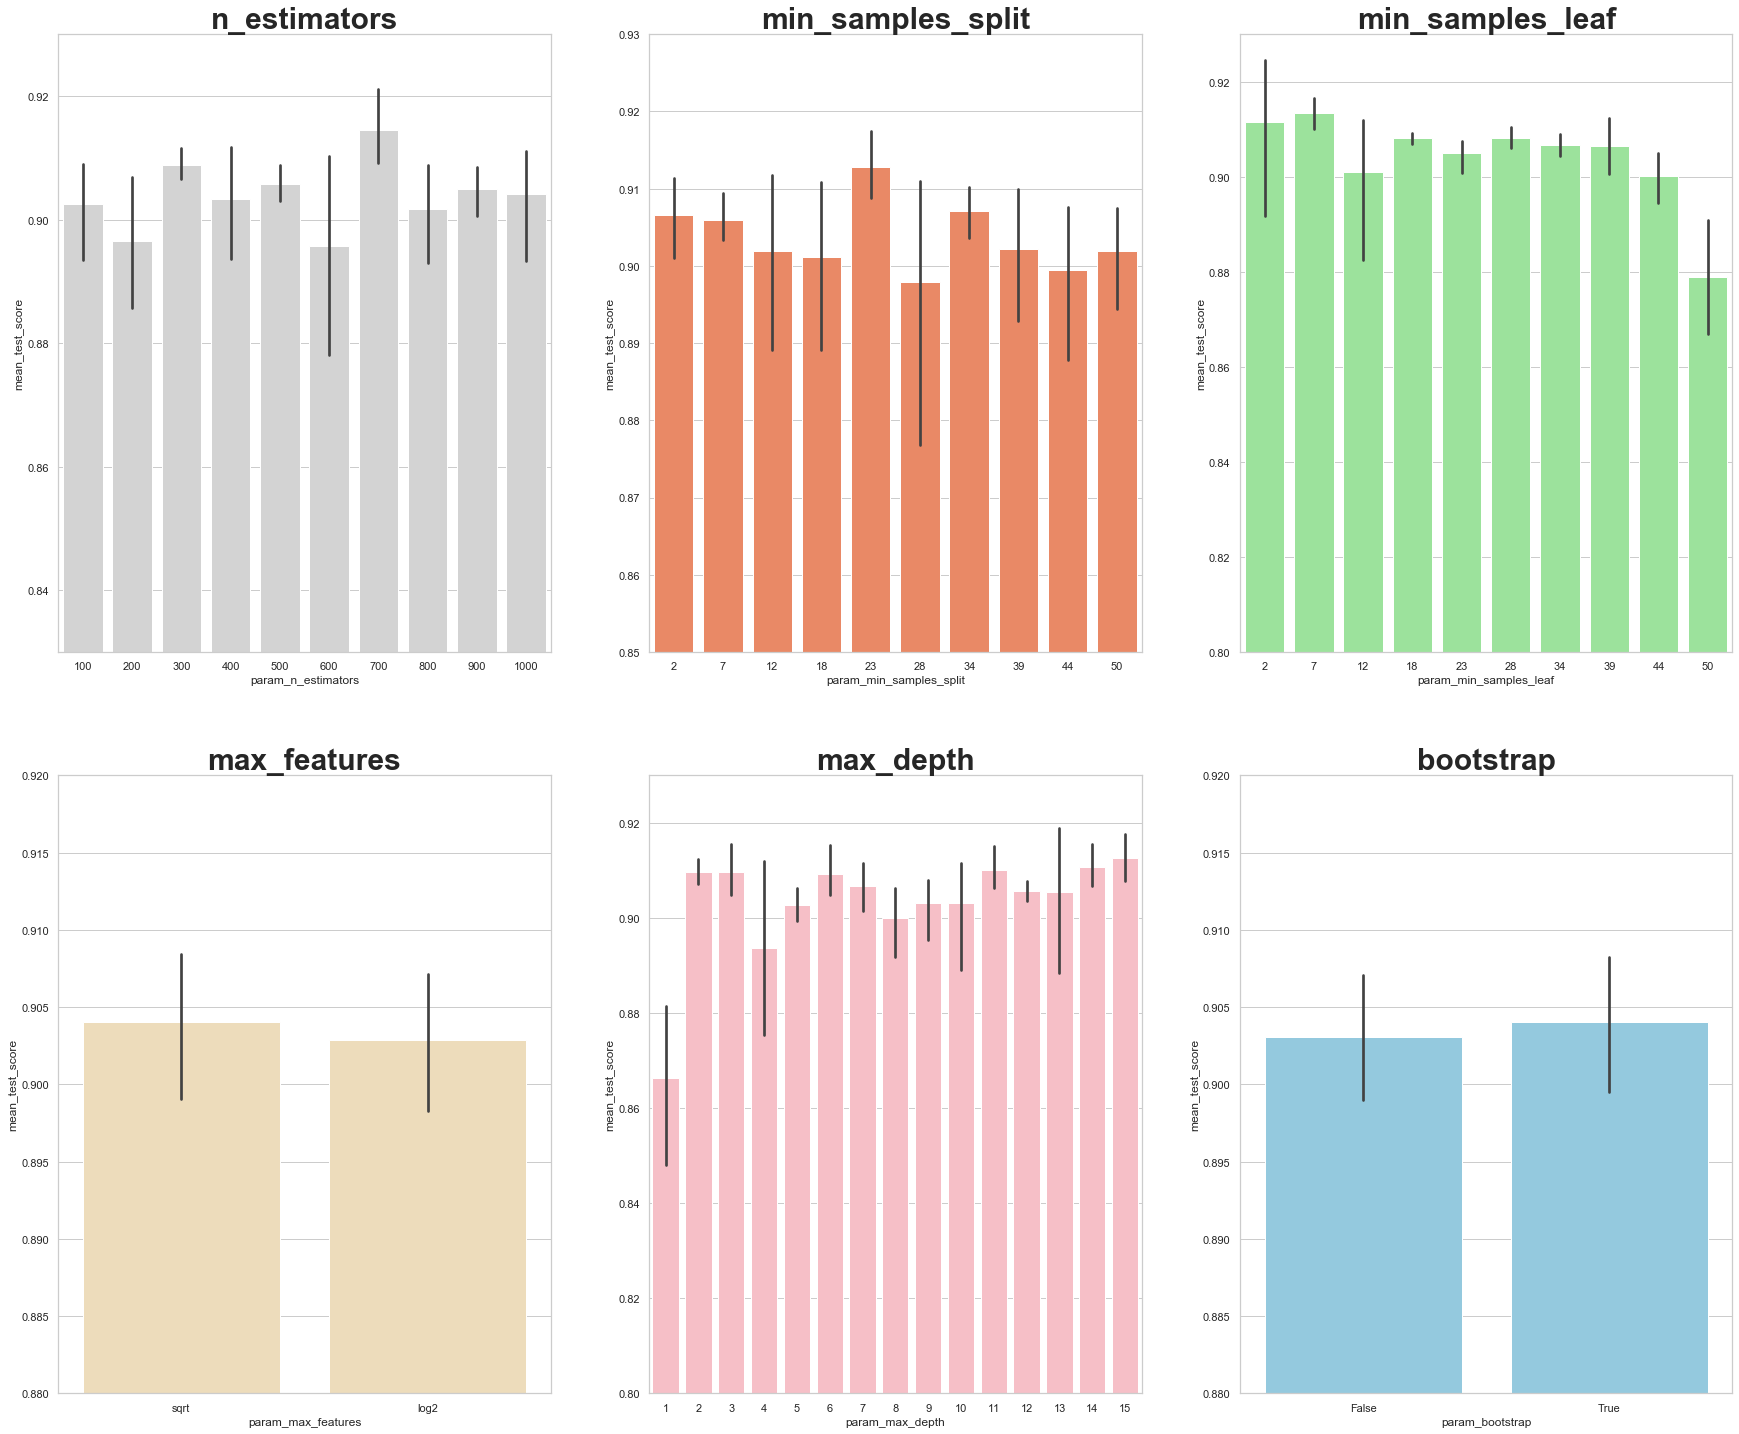

In [13]:
# create bar plots of each hyperparameter 
# ----------------------------------------------------------------------------------------------------------------------------

fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,.93])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,.93])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')

sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.88,.92])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')

plt.show()

In [14]:
# Hyperparameter Tuning: GridSearchCV
# ----------------------------------------------------------------------------------------------------------------------------
# - In GridSearchCV, every single combination of hyperparameter values is tried which takes much more computational power 
#   than RandomSearchCV, where we can directly control how many iterations we want to try.

#{'n_estimators': 700,
# 'min_samples_split': 12,
# 'min_samples_leaf': 2,
# 'max_features': 'sqrt',
# 'max_depth': 13,
# 'bootstrap': False}

n_estimators = [300,500,700]
max_features = ['sqrt']
max_depth = [2,3,7,11,12,15]
min_samples_split = [2,3,4,22,23,24,26]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gs = GridSearchCV(rfc_2, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled_pca, y_train)

rfc_3 = gs.best_estimator_
gs.best_params_

# {'bootstrap': False,
# 'max_depth': 15,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 2,
# 'min_samples_split': 2,
# 'n_estimators': 500}

Fitting 3 folds for each of 756 candidates, totalling 2268 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 2268 out of 2268 | elapsed: 10.9min finished


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [15]:
# Evaluate Performance Of Models On Test Data
# ----------------------------------------------------------------------------------------------------------------------------

y_pred = rfc.predict(X_test_scaled)
y_pred_pca = rfc_2.predict(X_test_scaled_pca)
y_pred_gs = gs.best_estimator_.predict(X_test_scaled_pca)



In [19]:
# Create Confusion Matrix for each model
# ----------------------------------------------------------------------------------------------------------------------------
# - Using recall as performance metric because we are dealing with diagnosing cancer
# - most concerned with minimizing False Negative prediction errors in our model.

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                                    index = ['actual 0', 'actual 1'], 
                                    columns = ['predicted 0', 'predicted 1'])

conf_matrix_baseline_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_pca), 
                                        index = ['actual 0', 'actual 1'], 
                                        columns = ['predicted 0', 'predicted 1'])

conf_matrix_tuned_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_gs), 
                                     index = ['actual 0', 'actual 1'], 
                                     columns = ['predicted 0', 'predicted 1'])

display(conf_matrix_baseline)
print(f'Baseline RF Recall == {round(recall_score(y_test, y_pred)*100,2)}%')

display(conf_matrix_baseline_pca)
print(f'Baseline RF With PCA Recall == {round(recall_score(y_test, y_pred_pca)*100,2)}%')

display(conf_matrix_tuned_pca)
print(f'Hyperparameter Tuned RF With PCA Reduced Dimensionality Recall == {round(recall_score(y_test, y_pred_gs)*100,2)}%')

,predicted 0,predicted 1
actual 0,100,6
actual 1,11,168


Baseline RF Recall == 93.85%


,predicted 0,predicted 1
actual 0,99,7
actual 1,9,170


Baseline RF With PCA Recall == 94.97%


,predicted 0,predicted 1
actual 0,100,6
actual 1,11,168


Hyperparameter Tuned RF With PCA Reduced Dimensionality Recall == 93.85%


### Baseline model correctly predicted that 170 patients had cancer, out of a total of 179 people who actually had cancer.

NOTE: Sometimes, after PCA, or even after extensive hyperparameter tuning, a tuned model may not perform as well as a plain-old “vanilla” model